### task 2c)

alpha = 0.2 + d/100 = 0.2 + 0.02 = 0.22

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from scipy import interpolate

In [71]:
L = 1  # Length of domain in x direction
h = 0.001*11  # Height of domain in y direction
Nx = 5000 # Number of grid points in x direction
Ny = 500  # Number of grid points in y direction
dx = L/Nx  # Grid spacing in x direction
dy = h/Ny  # Grid spacing in y direction
ue = 30  # Free-stream velocity
nu = 1.45e-5  # Kinematic viscosity
Re = 1/nu  # Reynolds number

# Initialize solution arrays
u = np.zeros(Ny)  # Velocity in x direction
v = np.zeros(Ny)  # Velocity in y direction
x = np.linspace(0, L, Nx)  # Grid points in x direction
y = np.linspace(0, h, Ny)  # Grid points in y direction
# Set initial conditions
for i in range(1,Ny-1):
    u[i] = ue  # Velocity at the top boundary
    v[i] = 0  # Velocity at the left boundary

# Define the tridiagonal matrix
a = np.zeros(Ny)
b = np.zeros(Ny)
c = np.zeros(Ny)
d = np.zeros(Ny)

#initializing top and bottom corner of the trigonal matrix
b[0] = 1
c[0] = 0
d[0] = 0
a[Ny-1] = 0
b[Ny-1] = 1
d[Ny-1] = ue

up = np.zeros(Ny)
displacement_thickness = np.zeros(Nx)
momentum_thickness = np.zeros(Nx)

In [72]:
for i in range(0,Nx):
    v[0] = 0
    for j in range(1, Ny-1):
        a[j] = - v[j]/2 *dx/dy - dx/(Re * dy**2)
        b[j] = u[j] + 2*dx/(Re * dy**2)
        c[j] = v[j]/2 *dx/dy - dx/(Re * dy**2)
        d[j] = u[j]**2
    for j in range(0,Ny-2):
        fac = a[j+1]/b[j]
        b[j+1] = b[j+1] - fac*c[j]
        d[j+1] = d[j+1] - fac*d[j]
    
    u[Ny-1] = d[Ny-1]/b[Ny-1]
    
    for j in range(Ny-2,-1,-1): 
        u[j] = (d[j]-c[j]*u[j+1])/b[j]
    
    for j in range(1,Ny):
        v[j] = v[j-1] - dy/(2*dx)*((u[j]-up[j]+u[j-1]-up[j-1]))
    
    displacement_thickness[i] = np.trapz(1-u/ue,y)
    momentum_thickness[i] = np.trapz(u/ue*(1-u/ue),y)
    #integrand = 1 - u/ue 
    #integral = integrate.quad(integrand, y[0],y[Ny-1])
    #displacement_thickness[i] = integral
    #integrand = u/ue*(1-u/ue) 
    #integral = integrate.quad(integrand, y[0],y[Ny-1])
    #momentum_thickness[i] = integral
    for j in range(Ny):
        up[j] = u[j]
#print('a=',a)
#print('b=',b)
#print('c=',c)
#print('d=',d)
#print('u=',u)

H =  [4.50344828 8.10841562 3.95704806 ... 2.59102853 2.59102854 2.59102856]


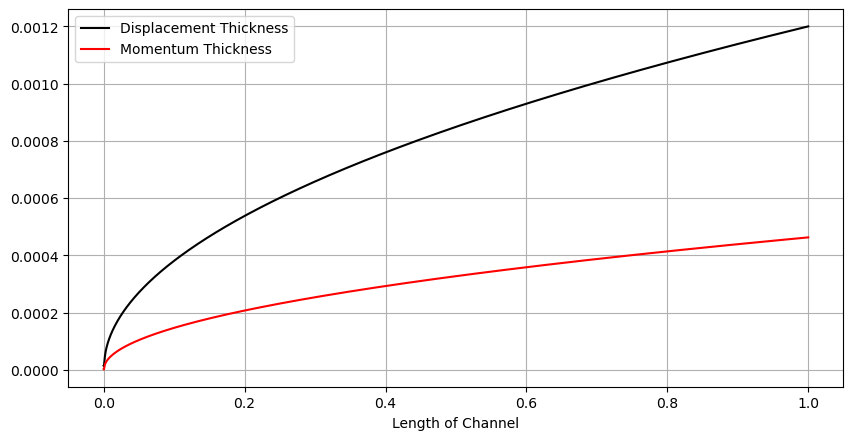

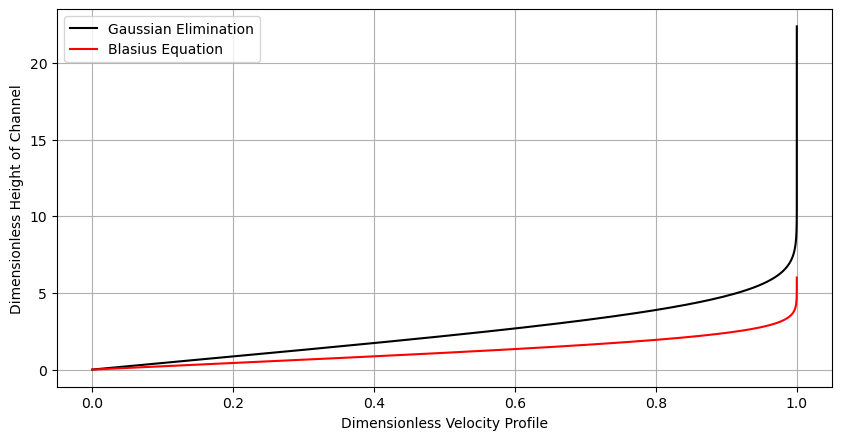

In [73]:
H = displacement_thickness/momentum_thickness
print('H = ',H)
etap=y*np.sqrt(ue/(nu*0.5));
z=u/ue;
def blas(eta,f): # define the Blasius equation
    blas=(f[1],f[2],-f[0]*f[2])
    return blas

f0=(0.0,0.0,0.4696) # wall condition (adjust f0(2) until u=1 in freestream)
etamax=6.0 # how far to integrate out to
nplot=501 # need to be quite large for accurate trapezoid integration later
outrange=np.zeros(nplot)
for i in range(nplot):
    outrange[i]=i*etamax/(nplot-1) # should be a quicker way of doing this

# shoot out from wall to freestream (NB tolerances reduced below default values)
p=integrate.solve_ivp(blas,[0,etamax],f0,t_eval=outrange,rtol=1.e-8,atol=1.e-10)

eta=p.t
u1=p.y[1,:]
dref=eta[-1]-p.y[0,-1]

from matplotlib.pyplot import figure
figure(figsize=(10, 5), dpi=100)
plt.plot(x,displacement_thickness,'k',label='Displacement Thickness')
plt.plot(x,momentum_thickness,'r',label='Momentum Thickness')
plt.xlabel('Length of Channel')
plt.legend()
plt.grid()
plt.show()
from matplotlib.pyplot import figure
figure(figsize=(10, 5), dpi=100)
plt.plot(z,etap,'k',label='Gaussian Elimination')
plt.plot(u1,eta,'r',label='Blasius Equation')
plt.xlabel('Dimensionless Velocity Profile')
plt.ylabel('Dimensionless Height of Channel')
plt.legend()
plt.grid()
plt.show()

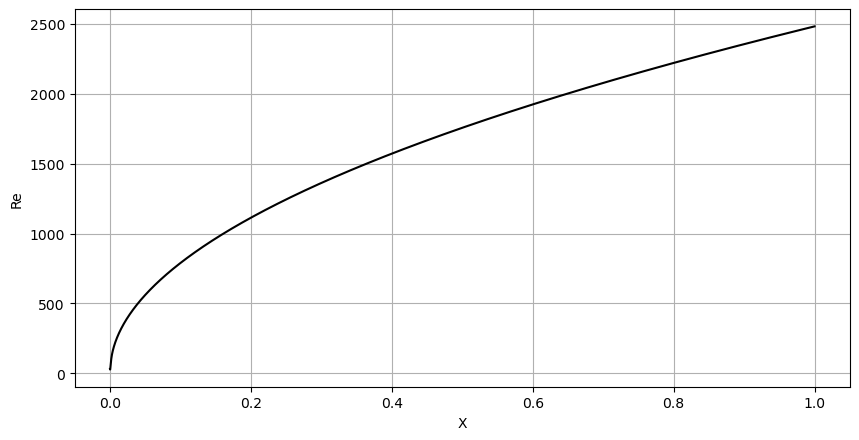

In [74]:
Red = ue*displacement_thickness/nu
from matplotlib.pyplot import figure
figure(figsize=(10, 5), dpi=100)
plt.plot(x,Red,'k')
plt.xlabel('X')
plt.ylabel('Re')
plt.grid()
plt.show()

In [75]:
def cheb_matrix(n):
    y=np.zeros(n)
    nm=n-1
    for i in range(n):
        y[i]=np.cos(np.pi*i/nm)              
    d=np.zeros((n,n))
    d[0,0]=(1.0+2.0*nm*nm)/6.0;
    d[0,-1]=(-1.0)**nm/(y[0]-y[-1]);
    d[-1,0]=(-1.0)**nm/(y[-1]-y[0]);
    d[-1,-1]=-(1.0+2.0*nm*nm)/6.0;
    for i in range(1,nm):
        d[i,0]=(-1.0)**i/(2.0*(y[i]-y[0]));
        d[i,-1]=(-1.0)**(i+nm)/(2.0*(y[i]-y[-1]))
    for j in range(1,nm):
        d[0,j]=(-1.0)**j*2.0/(y[0]-y[j])
        d[-1,j]=(-1.0)**(j+nm)*2.0/(y[-1]-y[j])
    for i in range(1,nm):
        for j in range(1,nm):
            if i==j:
                d[i,i]=-y[i]/(2.0*(1.0-y[i]**2))
            else:
                d[i,j]=(-1.0)**(i+j)/(y[i]-y[j])
    return y,d
#
# Initialise 
n=80
eta,d1p=cheb_matrix(n)
d2p=np.matmul(d1p,d1p)
d3p=np.matmul(d2p,d1p)
d4p=np.matmul(d2p,d2p)
L=30 # mapping parqameter
eta[0]=1.0-1.0e-6
y=L*(1.0+eta)/(1.0-eta)
#print(y)
eta1=(-((y-L)/(L+y)**2)+1.0/(L+y))
eta2=(2.0*(y-L)/(L+y)**3-2.0/(L+y)**2)
eta3=(-6.0*(y-L)/(L+y)**4+6.0/(L+y)**3)
eta4=(24.0*(y-L)/(L+y)**5-24.0/(L+y)**4)

d1=np.zeros((n,n))
d2=np.zeros((n,n))
d3=np.zeros((n,n))
d4=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        d4[i,j]=eta1[i]**4*d4p[i,j]+6.0*eta1[i]**2*eta2[i]*d3p[i,j]+(3.0*eta2[i]**2+4.0*eta1[i]*eta3[i])*d2p[i,j]+eta4[i]*d1p[i,j]
        d3[i,j]=eta1[i]**3*d3p[i,j]+3.0*eta1[i]*eta2[i]*d2p[i,j]+eta3[i]*d1p[i,j]
        d2[i,j]=eta1[i]**2*d2p[i,j]+eta2[i]*d1p[i,j]
        d1[i,j]=eta1[i]*d1p[i,j]  
#
# Set the velocity profile for Blasius flow
def blas(eta,f): # define the Blasius equation
    blas=(f[1],f[2],-f[0]*f[2])
    return blas

f0=(0.0,0.0,0.4696) # wall condition (adjust f0(2) until u=1 in freestream)
etamax=6.0 # how far to integrate out to
nplot=101 
outrange=np.zeros(nplot)
for i in range(nplot):
    outrange[i]=i*etamax/(nplot-1) # should be a quicker way of doing this

# shoot out from wall to freestream (NB tolerances reduced below default values)
p=integrate.solve_ivp(blas,[0,etamax],f0,t_eval=outrange,rtol=1.e-6,atol=1.e-8)

etab=p.t
ub=p.y[1,:]
#print('\nu freestream= ',ub[-1])
dref=etab[-1]-p.y[0,-1]
#print('\n dref= ',dref)
#plt.plot(etab,ub) # velocity profile

# spline fit from ub, etab/dref to u,y
tck=interpolate.splrep(etab/dref,ub,s=0)
ymax=etamax/dref
u=np.zeros(n)
for i in range(n):
    if y[i] < ymax:
        u[i]=interpolate.splev(y[i],tck,der=0)
    else:
        u[i]=1.0

#print(y)
#print(u)
#plt.plot(y,u)
#plt.xlim([0, 5])
#plt.ylim([0,1.05])

#d1u=np.matmul(d1,u)
d2u=np.matmul(d2,u)

iw = []
w = []
# set flow parameters
for i in range(1,5010,10):
    re=i
    alpha=0.22

    A=np.zeros((n,n),dtype=complex)
    B=np.zeros((n,n),dtype=complex)
    for i in range(n):
        for j in range(n):
            A[i,j]=(u[i]-2.0j*alpha/re)*d2[i,j]+1.0j/(re*alpha)*d4[i,j]
            B[i,j]=d2[i,j]
            if i==j:
                A[i,j]=A[i,j]+1.0j*alpha**3/re-u[i]*alpha**2-d2u[i]
                B[i,j]=B[i,j]-alpha**2

    # now the boundary condition
    for j in range(n):
        A[0,j]=0.0
        A[1,j]=0.0
        A[n-2,j]=0.0
        A[n-1,j]=0.0
        B[0,j]=0.0
        B[1,j]=d1[-1,j]
        B[-2,j]=d1[0,j]
        B[-1,j]=0.0
    B[0,0]=1.0
    B[n-1,n-1]=1.0

    Binv=np.linalg.inv(B)
    eigvals,eigvects=np.linalg.eig(np.matmul(Binv,A))

    # alternative from scip, but no eigenvectors
    #from scipy import linalg
    #eigvals=linalg.eigvals(A,B)
    #print('\neigenvalues= ',eigvals)

    # find largest eigenvalue for 0.01<c_ph<0.99
    eval=np.complex(0.0,-1.e10)
    for i in range(n):
        if np.real(eigvals[i]) > 0.01:
            if np.real(eigvals[i]) < 0.99:
                if np.imag(eigvals[i])>np.imag(eval):
                    eval=eigvals[i]
    #print('\nLargest eigenvalue= ',eval*alpha)  # Gaster test case: 0.06312288+i0.00315665
    c=eval*alpha
    w.append(c)
    s = c.imag
    iw.append(s)
Re = np.linspace(1,5001,501)
for i in range(len(Re)):
    print('Re=',Re[i],'Imag of w=',iw[i])

C:\Users\Mac Pro\AppData\Local\Temp\ipykernel_5140\2562379228.py:132: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eval=np.complex(0.0,-1.e10)


Re= 1.0 Imag of w= -0.07633181340863947
Re= 11.0 Imag of w= -0.04812971057321001
Re= 21.0 Imag of w= -0.05265175994504049
Re= 31.0 Imag of w= -0.05041878904486868
Re= 41.0 Imag of w= -0.0387922548677171
Re= 51.0 Imag of w= -0.04392154240182967
Re= 61.0 Imag of w= -0.03711163768072649
Re= 71.0 Imag of w= -0.035265251747292926
Re= 81.0 Imag of w= -0.031811515699943935
Re= 91.0 Imag of w= -0.02895501474085711
Re= 101.0 Imag of w= -0.026542231567007177
Re= 111.0 Imag of w= -0.02446920828668729
Re= 121.0 Imag of w= -0.022662937991249653
Re= 131.0 Imag of w= -0.021070570314290556
Re= 141.0 Imag of w= -0.01965284790476701
Re= 151.0 Imag of w= -0.018379955460376303
Re= 161.0 Imag of w= -0.017228805528080534
Re= 171.0 Imag of w= -0.016181212203996983
Re= 181.0 Imag of w= -0.01522263130092339
Re= 191.0 Imag of w= -0.01434127204925286
Re= 201.0 Imag of w= -0.013527458454815466
Re= 211.0 Imag of w= -0.012773162056121888
Re= 221.0 Imag of w= -0.012071654632192175
Re= 231.0 Imag of w= -0.01141724632

Critical Re 

Re= 671.0 Imag of w= -1.3983405839649472e-05

Re= 681.0 Imag of w= 8.935255698815373e-05

In [66]:
Re_cri = 675
for i in range(len(Red)):
    print(Red[i],x[i])

30.58571760947069 0.0
26.395852525165413 0.00020004000800160032
33.032394097900415 0.00040008001600320064
42.87006943678433 0.000600120024004801
53.753647223439025 0.0008001600320064013
64.76911744549817 0.0010002000400080016
75.3979534800497 0.001200240048009602
85.32669940568569 0.0014002800560112022
94.40682078943682 0.0016003200640128026
102.62634194807487 0.0018003600720144029
110.06420602752736 0.002000400080016003
116.83962810306245 0.0022004400880176033
123.07393398159155 0.002400480096019204
128.87111370402732 0.0026005201040208044
134.31292879467915 0.0028005601120224045
139.46138178168974 0.0030006001200240046
144.36326095337927 0.003200640128025605
149.05429201014402 0.0034006801360272057
153.56225297350318 0.0036007201440288058
157.909156027726 0.003800760152030406
162.11275866693845 0.004000800160032006
166.18762318120895 0.004200840168033607
170.14587219968496 0.004400880176035207
173.9977356436638 0.004600920184036807
177.75195193008656 0.004800960192038408
181.41606615

1071.515283622756 0.1852370474094819
1072.090107604572 0.1854370874174835
1072.6646225446843 0.1856371274254851
1073.2388289415528 0.1858371674334867
1073.812727292297 0.1860372074414883
1074.3863180927037 0.1862372474494899
1074.9596018372292 0.1864372874574915
1075.5325790190052 0.1866373274654931
1076.1052501298448 0.1868373674734947
1076.6776156602466 0.1870374074814963
1077.2496760993988 0.1872374474894979
1077.8214319351855 0.1874374874974995
1078.3928836541918 0.1876375275055011
1078.9640317417056 0.1878375675135027
1079.534876681727 0.1880376075215043
1080.1054189569704 0.1882376475295059
1080.6756590488687 0.1884376875375075
1081.2455974375787 0.18863772754550912
1081.8152346019874 0.1888377675535107
1082.3845710197152 0.1890378075615123
1082.95360716712 0.1892378475695139
1083.5223435193036 0.1894378875775155
1084.0907805501147 0.1896379275855171
1084.6589187321554 0.1898379675935187
1085.2267585367824 0.19003800760152031
1085.7943004341162 0.1902380476095219
1086.36154489304

1522.9484904144792 0.3754750950190038
1523.3526479963812 0.3756751350270054
1523.756698208685 0.375875175035007
1524.160641136963 0.3760752150430086
1524.5644768666743 0.3762752550510102
1524.9682054831649 0.3764752950590118
1525.371827071668 0.3766753350670134
1525.7753417173017 0.376875375075015
1526.1787495050735 0.3770754150830166
1526.582050519879 0.37727545509101823
1526.9852448464978 0.3774754950990198
1527.3883325696008 0.3776755351070214
1527.7913137737455 0.377875575115023
1528.194188543378 0.3780756151230246
1528.5969569628317 0.37827565513102623
1528.9996191163302 0.3784756951390278
1529.402175087986 0.3786757351470294
1529.8046249617983 0.378875775155031
1530.2069688216595 0.3790758151630326
1530.609206751348 0.3792758551710342
1531.0113388345326 0.3794758951790358
1531.4133651547731 0.3796759351870374
1531.815285795519 0.379875975195039
1532.217100840109 0.38007601520304063
1532.618810371775 0.3802760552110422
1533.020414473636 0.3804760952190438
1533.4219132287042 0.3806

1877.3692072855156 0.5713142628525705
1877.6969907646305 0.5715143028605721
1878.024716973421 0.5717143428685737
1878.3523859419058 0.5719143828765754
1878.6799977000774 0.5721144228845769
1879.0075522779027 0.5723144628925785
1879.3350497053227 0.5725145029005801
1879.6624900122506 0.5727145429085817
1879.989873228575 0.5729145829165834
1880.3171993841572 0.5731146229245849
1880.6444685088347 0.5733146629325865
1880.9716806324166 0.5735147029405882
1881.2988357846873 0.5737147429485897
1881.6259339954047 0.5739147829565914
1881.9529752943013 0.5741148229645929
1882.2799597110832 0.5743148629725945
1882.6068872754315 0.5745149029805962
1882.9337580170004 0.5747149429885977
1883.2605719654186 0.5749149829965993
1883.58732915029 0.5751150230046009
1883.9140296011915 0.5753150630126025
1884.2406733476748 0.5755151030206042
1884.5672604192666 0.5757151430286057
1884.8937908454673 0.5759151830366073
1885.220264655751 0.5761152230446089
1885.546681879569 0.5763152630526105
1885.8730425463432

2164.514430653397 0.7599519903980796
2164.7986993708582 0.7601520304060813
2165.0829307351987 0.7603520704140828
2165.3671247611396 0.7605521104220844
2165.6512814634 0.760752150430086
2165.935400856683 0.7609521904380876
2166.219482955685 0.7611522304460893
2166.5035277750917 0.7613522704540908
2166.787535329581 0.7615523104620924
2167.0715056338167 0.761752350470094
2167.355438702459 0.7619523904780956
2167.639334550154 0.7621524304860973
2167.9231931915397 0.7623524704940988
2168.207014641245 0.7625525105021004
2168.4907989138883 0.762752550510102
2168.774546024079 0.7629525905181036
2169.0582559864174 0.7631526305261053
2169.3419288154923 0.7633526705341068
2169.6255645258852 0.7635527105421084
2169.909163132166 0.76375275055011
2170.192724648898 0.7639527905581116
2170.476249090632 0.7641528305661133
2170.7597364719104 0.7643528705741148
2171.0431868072656 0.7645529105821164
2171.326600111222 0.764752950590118
2171.609976398294 0.7649529905981196
2171.893315682984 0.76515303060612

2433.7502029817488 0.9611922384476895
2434.0030068035585 0.9613922784556912
2434.2557843546215 0.9615923184636928
2434.508535643129 0.9617923584716943
2434.761260677267 0.961992398479696
2435.0139594652155 0.9621924384876975
2435.2666320151516 0.9623924784956991
2435.51927833525 0.9625925185037008
2435.7718984336784 0.9627925585117023
2436.024492318601 0.962992598519704
2436.2770599981786 0.9631926385277055
2436.5296014805676 0.9633926785357071
2436.782116773919 0.9635927185437088
2437.03460588638 0.9637927585517103
2437.2870688260955 0.963992798559712
2437.5395056012035 0.9641928385677135
2437.7919162198395 0.9643928785757151
2438.0443006901332 0.9645929185837168
2438.296659020212 0.9647929585917183
2438.548991218199 0.96499299859972
2438.8012972922097 0.9651930386077215
2439.05357725036 0.9653930786157231
2439.305831100759 0.9655931186237248
2439.5580588515118 0.9657931586317263
2439.8102605107206 0.965993198639728
2440.0624360864817 0.9661932386477295
2440.314585586889 0.96639327865

Re = 675.4857072326301 Xo = 0.07301460292058412

Therefore for Critical Re of 675 the nuteral point Xo is at 0.073

In [67]:
Xo = 0.073
sp = 0.18
X1 = Xo + sp
X2 = X1 + sp
X3 = X2 + sp
X4 = X3 + sp
X5 = X4 + sp
print(Xo,X1,X2,X3,X4,X5)

0.073 0.253 0.433 0.613 0.7929999999999999 0.9729999999999999


In [68]:
for i in range(len(Red)):
    print(displacement_thickness[i],x[i])

1.4783096844577502e-05 0.0
1.2757995387163283e-05 0.00020004000800160032
1.5965657147318536e-05 0.00040008001600320064
2.0720533561112422e-05 0.000600120024004801
2.598092949132886e-05 0.0008001600320064013
3.130507343199078e-05 0.0010002000400080016
3.644234418202402e-05 0.001200240048009602
4.1241238046081416e-05 0.0014002800560112022
4.562996338156113e-05 0.0016003200640128026
4.9602731941569525e-05 0.0018003600720144029
5.319769957997156e-05 0.002000400080016003
5.647248691648019e-05 0.0022004400880176033
5.948573475776925e-05 0.002400480096019204
6.228770495694653e-05 0.0026005201040208044
6.491791558409492e-05 0.0028005601120224045
6.740633452781671e-05 0.0030006001200240046
6.977557612746665e-05 0.003200640128025605
7.204290780490294e-05 0.0034006801360272057
7.422175560385987e-05 0.0036007201440288058
7.632275874673423e-05 0.003800760152030406
7.835450002235358e-05 0.004000800160032006
8.032401787091766e-05 0.004200840168033607
8.223717156318105e-05 0.004400880176035207
8.40989

0.0005258963908497429 0.19103820764152832
0.0005261699862117293 0.1912382476495299
0.0005264434389360884 0.19143828765753151
0.0005267167492459148 0.1916383276655331
0.0005269899173637222 0.1918383676735347
0.000527262943511445 0.1920384076815363
0.0005275358279104407 0.1922384476895379
0.0005278085707814918 0.19243848769753952
0.0005280811723448075 0.1926385277055411
0.0005283536328200262 0.1928385677135427
0.0005286259524262183 0.1930386077215443
0.0005288981313818862 0.1932386477295459
0.0005291701699049691 0.19343868773754752
0.0005294420682128424 0.1936387277455491
0.000529713826522322 0.19383876775355072
0.000529985445049664 0.1940388077615523
0.0005302569240105688 0.1942388477695539
0.0005305282636201823 0.19443888777755552
0.0005307994640930976 0.1946389277855571
0.0005310705256433571 0.19483896779355872
0.0005313414484844553 0.1950390078015603
0.0005316122328293394 0.19523904780956192
0.000531882878890412 0.1954390878175635
0.0005321533868795335 0.1956391278255651
0.0005324237

0.0007403773881345008 0.379875975195039
0.0007405715987393861 0.38007601520304063
0.0007407657583463579 0.3802760552110422
0.0007409598669955908 0.3804760952190438
0.0007411539247272071 0.3806761352270454
0.0007413479315812766 0.380876175235047
0.0007415418875978164 0.38107621524304863
0.000741735792816791 0.3812762552510502
0.0007419296472781128 0.3814762952590518
0.0007421234510216419 0.3816763352670534
0.0007423172040871862 0.381876375275055
0.0007425109065145012 0.38207641528305664
0.0007427045583432912 0.3822764552910582
0.0007428981596132077 0.3824764952990598
0.0007430917103638516 0.3826765353070614
0.0007432852106347707 0.38287657531506303
0.0007434786604654626 0.38307661532306464
0.0007436720598953723 0.3832766553310662
0.0007438654089638937 0.3834766953390678
0.0007440587077103698 0.3836767353470694
0.0007442519561740923 0.38387677535507103
0.0007444451543943013 0.3840768153630726
0.0007446383024101861 0.3842768553710742
0.0007448314002608853 0.3844768953790758
0.000745024447

0.0009097686471936902 0.5743148629725945
0.0009099266621831252 0.5745149029805962
0.0009100846497082168 0.5747149429885977
0.0009102426097832856 0.5749149829965993
0.0009104005424226402 0.5751150230046009
0.0009105584476405759 0.5753150630126025
0.0009107163254513762 0.5755151030206042
0.0009108741758693123 0.5757151430286057
0.0009110319989086425 0.5759151830366073
0.0009111897945836131 0.5761152230446089
0.0009113475629084583 0.5763152630526105
0.0009115053038973992 0.5765153030606122
0.0009116630175646452 0.5767153430686137
0.0009118207039243933 0.5769153830766153
0.0009119783629908281 0.5771154230846169
0.0009121359947781214 0.5773154630926185
0.0009122935993004341 0.5775155031006202
0.0009124511765719136 0.5777155431086217
0.0009126087266066952 0.5779155831166233
0.0009127662494189028 0.5781156231246249
0.0009129237450226474 0.5783156631326265
0.0009130812134320276 0.5785157031406282
0.000913238654661131 0.5787157431486297
0.0009133960687240313 0.5789157831566313
0.000913553455634

0.001054802977649008 0.7725545109021804
0.0010549392505094755 0.7727545509101821
0.0010550755057553386 0.7729545909181836
0.0010552117433934272 0.7731546309261852
0.0010553479634305683 0.7733546709341869
0.0010554841658735835 0.7735547109421884
0.00105562035072929 0.7737547509501901
0.0010557565180045005 0.7739547909581916
0.0010558926677060247 0.7741548309661932
0.0010560287998406654 0.7743548709741949
0.0010561649144152226 0.7745549109821964
0.0010563010114364925 0.7747549509901981
0.0010564370909112654 0.7749549909981996
0.0010565731528463284 0.7751550310062012
0.001056709197248463 0.7753550710142029
0.001056845224124448 0.7755551110222044
0.0010569812334810566 0.7757551510302061
0.0010571172253250577 0.7759551910382076
0.0010572531996632167 0.7761552310462092
0.0010573891565022933 0.7763552710542109
0.001057525095849044 0.7765553110622124
0.0010576610177102201 0.7767553510702141
0.0010577969220925702 0.7769553910782157
0.0010579328090028358 0.7771554310862172
0.0010580686784477569 

0.0011798509242298093 0.966993398679736
0.001179972746115062 0.9671934386877376
0.0011800945554167545 0.9673934786957391
0.0011802163521387856 0.9675935187037408
0.0011803381362850533 0.9677935587117423
0.0011804599078594534 0.967993598719744
0.0011805816668658776 0.9681936387277456
0.0011807034133082192 0.9683936787357471
0.0011808251471903664 0.9685937187437488
0.001180946868516207 0.9687937587517503
0.0011810685772896264 0.968993798759752
0.0011811902735145085 0.9691938387677536
0.0011813119571947338 0.9693938787757551
0.001181433628334182 0.9695939187837568
0.0011815552869367308 0.9697939587917583
0.0011816769330062551 0.96999399879976
0.0011817985665466282 0.9701940388077616
0.001181920187561722 0.9703940788157631
0.0011820417960554058 0.9705941188237648
0.0011821633920315467 0.9707941588317663
0.0011822849754940102 0.970994198839768
0.0011824065464466607 0.9711942388477696
0.001182528104893358 0.9713942788557711
0.0011826496508379625 0.9715943188637728
0.0011827711842843317 0.971

In [77]:
def cheb_matrix(n):
    y=np.zeros(n)
    nm=n-1
    for i in range(n):
        y[i]=np.cos(np.pi*i/nm)              
    d=np.zeros((n,n))
    d[0,0]=(1.0+2.0*nm*nm)/6.0;
    d[0,-1]=(-1.0)**nm/(y[0]-y[-1]);
    d[-1,0]=(-1.0)**nm/(y[-1]-y[0]);
    d[-1,-1]=-(1.0+2.0*nm*nm)/6.0;
    for i in range(1,nm):
        d[i,0]=(-1.0)**i/(2.0*(y[i]-y[0]));
        d[i,-1]=(-1.0)**(i+nm)/(2.0*(y[i]-y[-1]))
    for j in range(1,nm):
        d[0,j]=(-1.0)**j*2.0/(y[0]-y[j])
        d[-1,j]=(-1.0)**(j+nm)*2.0/(y[-1]-y[j])
    for i in range(1,nm):
        for j in range(1,nm):
            if i==j:
                d[i,i]=-y[i]/(2.0*(1.0-y[i]**2))
            else:
                d[i,j]=(-1.0)**(i+j)/(y[i]-y[j])
    return y,d
#
# Initialise 
n=80
eta,d1p=cheb_matrix(n)
d2p=np.matmul(d1p,d1p)
d3p=np.matmul(d2p,d1p)
d4p=np.matmul(d2p,d2p)
L=30 # mapping parqameter
eta[0]=1.0-1.0e-6
y=L*(1.0+eta)/(1.0-eta)
#print(y)
eta1=(-((y-L)/(L+y)**2)+1.0/(L+y))
eta2=(2.0*(y-L)/(L+y)**3-2.0/(L+y)**2)
eta3=(-6.0*(y-L)/(L+y)**4+6.0/(L+y)**3)
eta4=(24.0*(y-L)/(L+y)**5-24.0/(L+y)**4)

d1=np.zeros((n,n))
d2=np.zeros((n,n))
d3=np.zeros((n,n))
d4=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        d4[i,j]=eta1[i]**4*d4p[i,j]+6.0*eta1[i]**2*eta2[i]*d3p[i,j]+(3.0*eta2[i]**2+4.0*eta1[i]*eta3[i])*d2p[i,j]+eta4[i]*d1p[i,j]
        d3[i,j]=eta1[i]**3*d3p[i,j]+3.0*eta1[i]*eta2[i]*d2p[i,j]+eta3[i]*d1p[i,j]
        d2[i,j]=eta1[i]**2*d2p[i,j]+eta2[i]*d1p[i,j]
        d1[i,j]=eta1[i]*d1p[i,j]  
#
# Set the velocity profile for Blasius flow
def blas(eta,f): # define the Blasius equation
    blas=(f[1],f[2],-f[0]*f[2])
    return blas

f0=(0.0,0.0,0.4696) # wall condition (adjust f0(2) until u=1 in freestream)
etamax=6.0 # how far to integrate out to
nplot=101 
outrange=np.zeros(nplot)
for i in range(nplot):
    outrange[i]=i*etamax/(nplot-1) # should be a quicker way of doing this

# shoot out from wall to freestream (NB tolerances reduced below default values)
p=integrate.solve_ivp(blas,[0,etamax],f0,t_eval=outrange,rtol=1.e-6,atol=1.e-8)

etab=p.t
ub=p.y[1,:]
#print('\nu freestream= ',ub[-1])
dref=etab[-1]-p.y[0,-1]
#print('\n dref= ',dref)
#plt.plot(etab,ub) # velocity profile

# spline fit from ub, etab/dref to u,y
tck=interpolate.splrep(etab/dref,ub,s=0)
ymax=etamax/dref
u=np.zeros(n)
for i in range(n):
    if y[i] < ymax:
        u[i]=interpolate.splev(y[i],tck,der=0)
    else:
        u[i]=1.0

#print(y)
#print(u)
#plt.plot(y,u)
#plt.xlim([0, 5])
#plt.ylim([0,1.05])

#d1u=np.matmul(d1,u)
d2u=np.matmul(d2,u)

iw = []
w = []
Re = [675,1251,1635,1945,2211,2448]
# set flow parameters
for i in range(len(Re)):
    re=Re[i]
    alpha=0.22

    A=np.zeros((n,n),dtype=complex)
    B=np.zeros((n,n),dtype=complex)
    for i in range(n):
        for j in range(n):
            A[i,j]=(u[i]-2.0j*alpha/re)*d2[i,j]+1.0j/(re*alpha)*d4[i,j]
            B[i,j]=d2[i,j]
            if i==j:
                A[i,j]=A[i,j]+1.0j*alpha**3/re-u[i]*alpha**2-d2u[i]
                B[i,j]=B[i,j]-alpha**2

    # now the boundary condition
    for j in range(n):
        A[0,j]=0.0
        A[1,j]=0.0
        A[n-2,j]=0.0
        A[n-1,j]=0.0
        B[0,j]=0.0
        B[1,j]=d1[-1,j]
        B[-2,j]=d1[0,j]
        B[-1,j]=0.0
    B[0,0]=1.0
    B[n-1,n-1]=1.0

    Binv=np.linalg.inv(B)
    eigvals,eigvects=np.linalg.eig(np.matmul(Binv,A))

    # alternative from scip, but no eigenvectors
    #from scipy import linalg
    #eigvals=linalg.eigvals(A,B)
    #print('\neigenvalues= ',eigvals)

    # find largest eigenvalue for 0.01<c_ph<0.99
    eval=np.complex(0.0,-1.e10)
    for i in range(n):
        if np.real(eigvals[i]) > 0.01:
            if np.real(eigvals[i]) < 0.99:
                if np.imag(eigvals[i])>np.imag(eval):
                    eval=eigvals[i]
    #print('\nLargest eigenvalue= ',eval*alpha)  # Gaster test case: 0.06312288+i0.00315665
    c=eval*alpha
    w.append(c)
    s = c.real
    iw.append(s)
#Re = np.linspace(1,5001,501)
for i in range(len(Re)):
    print('Re=',Re[i],'Imag of w=',iw[i])

Re= 675 Imag of w= 2.7701742694728286e-05
Re= 1251 Imag of w= 0.0031947465108853735
Re= 1635 Imag of w= 0.0039088872213285135
Re= 1945 Imag of w= 0.004178793983678252
Re= 2211 Imag of w= 0.0042849276477530136
Re= 2448 Imag of w= 0.00431400692212452


C:\Users\Mac Pro\AppData\Local\Temp\ipykernel_5140\1161789191.py:133: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eval=np.complex(0.0,-1.e10)


In [78]:
def cheb_matrix(n):
    y=np.zeros(n)
    nm=n-1
    for i in range(n):
        y[i]=np.cos(np.pi*i/nm)              
    d=np.zeros((n,n))
    d[0,0]=(1.0+2.0*nm*nm)/6.0;
    d[0,-1]=(-1.0)**nm/(y[0]-y[-1]);
    d[-1,0]=(-1.0)**nm/(y[-1]-y[0]);
    d[-1,-1]=-(1.0+2.0*nm*nm)/6.0;
    for i in range(1,nm):
        d[i,0]=(-1.0)**i/(2.0*(y[i]-y[0]));
        d[i,-1]=(-1.0)**(i+nm)/(2.0*(y[i]-y[-1]))
    for j in range(1,nm):
        d[0,j]=(-1.0)**j*2.0/(y[0]-y[j])
        d[-1,j]=(-1.0)**(j+nm)*2.0/(y[-1]-y[j])
    for i in range(1,nm):
        for j in range(1,nm):
            if i==j:
                d[i,i]=-y[i]/(2.0*(1.0-y[i]**2))
            else:
                d[i,j]=(-1.0)**(i+j)/(y[i]-y[j])
    return y,d
#
# Initialise 
n=80
eta,d1p=cheb_matrix(n)
d2p=np.matmul(d1p,d1p)
d3p=np.matmul(d2p,d1p)
d4p=np.matmul(d2p,d2p)
L=30 # mapping parqameter
eta[0]=1.0-1.0e-6
y=L*(1.0+eta)/(1.0-eta)
#print(y)
eta1=(-((y-L)/(L+y)**2)+1.0/(L+y))
eta2=(2.0*(y-L)/(L+y)**3-2.0/(L+y)**2)
eta3=(-6.0*(y-L)/(L+y)**4+6.0/(L+y)**3)
eta4=(24.0*(y-L)/(L+y)**5-24.0/(L+y)**4)

d1=np.zeros((n,n))
d2=np.zeros((n,n))
d3=np.zeros((n,n))
d4=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        d4[i,j]=eta1[i]**4*d4p[i,j]+6.0*eta1[i]**2*eta2[i]*d3p[i,j]+(3.0*eta2[i]**2+4.0*eta1[i]*eta3[i])*d2p[i,j]+eta4[i]*d1p[i,j]
        d3[i,j]=eta1[i]**3*d3p[i,j]+3.0*eta1[i]*eta2[i]*d2p[i,j]+eta3[i]*d1p[i,j]
        d2[i,j]=eta1[i]**2*d2p[i,j]+eta2[i]*d1p[i,j]
        d1[i,j]=eta1[i]*d1p[i,j]  
#
# Set the velocity profile for Blasius flow
def blas(eta,f): # define the Blasius equation
    blas=(f[1],f[2],-f[0]*f[2])
    return blas

f0=(0.0,0.0,0.4696) # wall condition (adjust f0(2) until u=1 in freestream)
etamax=6.0 # how far to integrate out to
nplot=101 
outrange=np.zeros(nplot)
for i in range(nplot):
    outrange[i]=i*etamax/(nplot-1) # should be a quicker way of doing this

# shoot out from wall to freestream (NB tolerances reduced below default values)
p=integrate.solve_ivp(blas,[0,etamax],f0,t_eval=outrange,rtol=1.e-6,atol=1.e-8)

etab=p.t
ub=p.y[1,:]
#print('\nu freestream= ',ub[-1])
dref=etab[-1]-p.y[0,-1]
#print('\n dref= ',dref)
#plt.plot(etab,ub) # velocity profile

# spline fit from ub, etab/dref to u,y
tck=interpolate.splrep(etab/dref,ub,s=0)
ymax=etamax/dref
u=np.zeros(n)
for i in range(n):
    if y[i] < ymax:
        u[i]=interpolate.splev(y[i],tck,der=0)
    else:
        u[i]=1.0

#print(y)
#print(u)
#plt.plot(y,u)
#plt.xlim([0, 5])
#plt.ylim([0,1.05])

#d1u=np.matmul(d1,u)
d2u=np.matmul(d2,u)

iw = []
w = []
Re = [675,1251,1635,1945,2211,2448]
# set flow parameters
for i in range(len(Re)):
    re=Re[i]
    alpha=0.220001

    A=np.zeros((n,n),dtype=complex)
    B=np.zeros((n,n),dtype=complex)
    for i in range(n):
        for j in range(n):
            A[i,j]=(u[i]-2.0j*alpha/re)*d2[i,j]+1.0j/(re*alpha)*d4[i,j]
            B[i,j]=d2[i,j]
            if i==j:
                A[i,j]=A[i,j]+1.0j*alpha**3/re-u[i]*alpha**2-d2u[i]
                B[i,j]=B[i,j]-alpha**2

    # now the boundary condition
    for j in range(n):
        A[0,j]=0.0
        A[1,j]=0.0
        A[n-2,j]=0.0
        A[n-1,j]=0.0
        B[0,j]=0.0
        B[1,j]=d1[-1,j]
        B[-2,j]=d1[0,j]
        B[-1,j]=0.0
    B[0,0]=1.0
    B[n-1,n-1]=1.0

    Binv=np.linalg.inv(B)
    eigvals,eigvects=np.linalg.eig(np.matmul(Binv,A))

    # alternative from scip, but no eigenvectors
    #from scipy import linalg
    #eigvals=linalg.eigvals(A,B)
    #print('\neigenvalues= ',eigvals)

    # find largest eigenvalue for 0.01<c_ph<0.99
    eval=np.complex(0.0,-1.e10)
    for i in range(n):
        if np.real(eigvals[i]) > 0.01:
            if np.real(eigvals[i]) < 0.99:
                if np.imag(eigvals[i])>np.imag(eval):
                    eval=eigvals[i]
    #print('\nLargest eigenvalue= ',eval*alpha)  # Gaster test case: 0.06312288+i0.00315665
    c=eval*alpha
    w.append(c)
    s = c.real
    iw.append(s)
#Re = np.linspace(1,5001,501)
for i in range(len(Re)):
    print('Re=',Re[i],'Imag of w=',iw[i])

C:\Users\Mac Pro\AppData\Local\Temp\ipykernel_5140\3089061547.py:133: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eval=np.complex(0.0,-1.e10)


Re= 675 Imag of w= 2.7743761214130393e-05
Re= 1251 Imag of w= 0.003194773713618278
Re= 1635 Imag of w= 0.003908904526744677
Re= 1945 Imag of w= 0.004178803763218385
Re= 2211 Imag of w= 0.00428493126597831
Re= 2448 Imag of w= 0.004314005237650833
